In [2]:
#DECLARAÇÃO DE BIBLIOTECAS

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns

In [18]:
#GERAÇÃO DE DADOS

N = 1000
np.random.seed(42)
x = np.sort(5 * np.random.rand(N, 1), axis=0)
T = np.linspace(0, 5, 200)[:, np.newaxis]
y = np.sin(x).ravel()
y_orig = np.sin(x).ravel()

# Add noise to targets.
y += 0.1*np.random.randn(N)

# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(len(y_test))

200


In [19]:
#GRID SEARCH

from sklearn.model_selection import GridSearchCV
parameters = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}]
clf = GridSearchCV(KNeighborsRegressor(), parameters, cv=5, verbose=3, n_jobs=-1)
clf.fit(x_train, y_train)
clf.best_params_
clf.best_score_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  72 out of 120 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.3s finished


0.9796209553627315

200


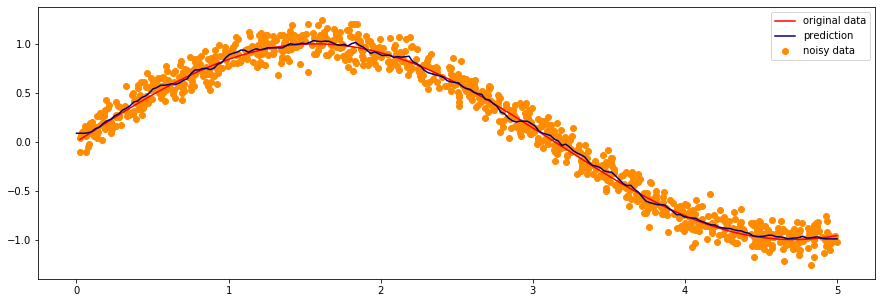

In [20]:
#PLOT GRÁFICO

y_predict = clf.predict(T)

plt.figure(figsize=(15,5))
plt.scatter(x, y, color='darkorange', label='noisy data')
plt.plot(x, y_orig, color='red', label='original data')
plt.plot(T, y_predict, color='navy', label='prediction')
plt.axis('tight')
plt.legend()

print(len(y_predict))

In [21]:
#CALCULO DO ERRO QUADRATICO MÉDIO

MSE = np.mean((y_predict - y_test) ** 2)

print('ERRO QUADRATICO MEDIO: ' , MSE)

ERRO QUADRATICO MEDIO:  0.9924856000478358
